<a href="https://colab.research.google.com/github/GR-TheArchitect/Colab_Public/blob/master/qc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random

In [0]:
import tensorflow
from tensorflow import keras
import sys

In [0]:
import cirq

In [0]:
def make_quantum_teleportation_circuit(ranX, ranY):
    circuit = cirq.Circuit()
    msg, alice, bob = cirq.LineQubit.range(3)
    circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])
    circuit.append([cirq.X(msg)**ranX, cirq.Y(msg)**ranY])
    circuit.append([cirq.CNOT(msg, alice), cirq.H(msg)])
    circuit.append(cirq.measure(msg, alice))
    circuit.append([cirq.CNOT(alice, bob), cirq.CZ(msg, bob)])
    
    return msg, circuit

In [0]:
def main():
    ranX = random.random()
    ranY= random.random()
    msg, circuit = make_quantum_teleportation_circuit(ranX, ranY)
    
    sim = cirq.Simulator()
    message = sim.simulate(cirq.Circuit.from_ops([cirq.X(msg)**ranX, cirq.Y(msg)**ranY]))
    
    print("Bloch Sphere of Alice's qubit:")
    b0X, b0Y, b0Z = cirq.bloch_vector_from_state_vector(message.final_state, 0)
    print("x: ", round(b0X, 4),
          "y: ", round(b0Y, 4),
          "z: ", round(b0Z, 4))
    
    print("\nCircuit:")
    print(circuit)
    
    final_results = sim.simulate(circuit)

    print("\nBloch Sphere of Bob's qubit:")
    b2X, b2Y, b2Z = cirq.bloch_vector_from_state_vector(final_results.final_state, 2)

    print("x: ", round(b2X, 4),
          "y: ", round(b2Y, 4),
          "z: ", round(b2Z, 4))

    if __name__ == '__main__':
        main()

In [0]:
import matplotlib.pyplot as plt
import sympy

Circuit:
0: ───X^t───M('z')───


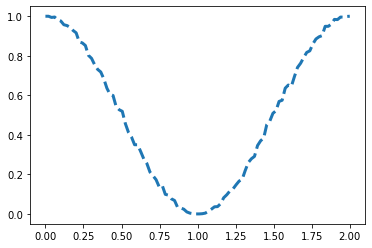

In [0]:
qbit = cirq.LineQubit(0)
circ = cirq.Circuit()

symbol = sympy.Symbol("t")
circ.append(cirq.XPowGate(exponent=symbol) (qbit))

circ.append(cirq.measure(qbit, key="z"))

print("Circuit:")
print(circ)

sweep = cirq.Linspace(key=symbol.name, start=0.0, stop=2.0, length=100)
sim = cirq.Simulator()
res = sim.run_sweep(circ, sweep, repetitions=1000)

angles = [x[0][1] for x in sweep.param_tuples()]
zeros = [res[i].histogram(key="z") [0] / 1000 for i in range(len(res))]
plt.plot(angles, zeros, "--", linewidth=3)

In [0]:
n = 10

def bitstring(bits):
    return ''.join('1' if e else '0' for e in bits)

qreg = [cirq.LineQubit(x) for x in range(n)]
circ = cirq.Circuit()

for x in range(n):
    circ.append([cirq.H(qreg[x]), cirq.measure(qreg[x])])

sim = cirq.Simulator()
res = sim.run(circ, repetitions=10)

#bits = bitstring(res.measurements.values())

print(res)

0=0110010010
1=1100001011
2=0010100100
3=0001101110
4=1011010101
5=1010101110
6=0100001000
7=0000111010
8=0101110101
9=1100001110
